In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing dataset from Scikit-learn
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [5]:
#converting into DataFrame
data = load_breast_cancer()
df = pd.DataFrame(X,columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#extracting almost linearly separable i/p variables
df = df[['mean radius','mean texture','target']]
df.head()

,mean radius,mean texture,target
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


In [6]:
#randomly choosing 100 reproducible data points for greater visibility
np.random.seed(42)
rand_nums = np.random.choice(range(df.shape[0]),100,replace=False)

(10.0, 30.0)

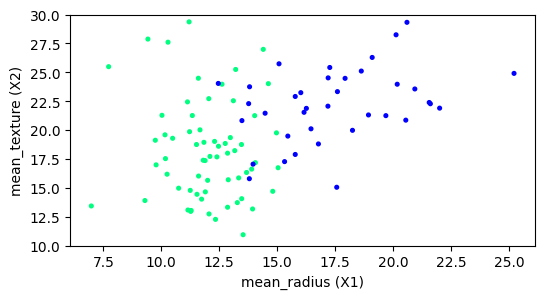

In [7]:
#scatter plot
plt.figure(figsize=(6,3))
plt.scatter(df['mean radius'][rand_nums],df['mean texture'][rand_nums],c=df['target'][rand_nums],cmap='winter',s=7)
plt.xlabel('mean_radius (X1)')
plt.ylabel('mean_texture (X2)')
plt.ylim(10,30)

In [8]:
#i/p data
X1 = df['mean radius'][rand_nums]
X2 = df['mean texture'][rand_nums]
X_new = np.column_stack((X1,X2))

#o/p data
y_new = df['target'][rand_nums]

Scikit-learn LogisticRegression:
---------------------------------
W0:  [22.79615407]
W1:  -1.3211349321296513
W2:  -0.18260530695276314




(10.0, 30.0)

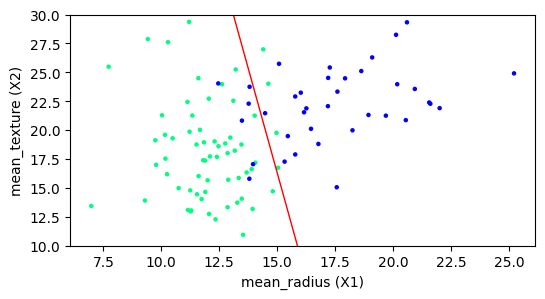

In [9]:
#Classification using Scikit-learn LogisticRegression class

from sklearn.linear_model import LogisticRegression #importing class 
log_reg_obj = LogisticRegression() #creating object
log_reg_obj.fit(X_new,y_new) #fitting model

#calculating slope and intercept
m1 = - (log_reg_obj.coef_[0][0]/log_reg_obj.coef_[0][1])
b1 = - (log_reg_obj.intercept_/log_reg_obj.coef_[0][1])

#printing weights
print('Scikit-learn LogisticRegression:')
print('---------------------------------')
print('W0: ',log_reg_obj.intercept_)
print('W1: ',log_reg_obj.coef_[0][0])
print('W2: ',log_reg_obj.coef_[0][1])
print('\n')

#calculating classifier line
X_points1 = np.linspace(12.5,17,100)
y_points1 = m1 * X_points1 + b1

#scatter plot with classifier
plt.figure(figsize=(6,3))
plt.scatter(df['mean radius'][rand_nums],df['mean texture'][rand_nums],c=df['target'][rand_nums],cmap='winter',s=5)
plt.plot(X_points1,y_points1,color='red',linewidth=1)
plt.xlabel('mean_radius (X1)')
plt.ylabel('mean_texture (X2)')
plt.ylim(10,30)

Gradient Descent for LogisticRegression:
------------------------------------------
W0:  24.805101216467406
W1:  -1.4579438905291733
W2:  -0.18704745972096667


(10.0, 30.0)

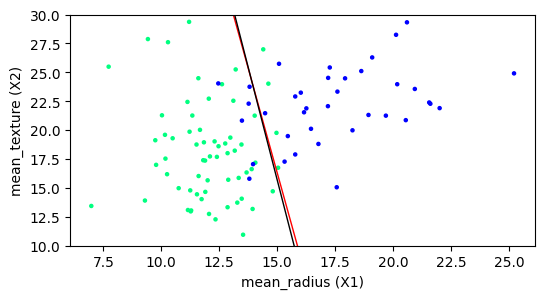

In [10]:
#defining dedicated class for gradient descent for Logistic Regression

class logistic_regression_gd:

    #constructor with hyperparameters as no. of epochs and learning_rate
    def __init__(self,epochs,learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate

    #defining function for gradient descent
    def log_reg_gd(self,X,y):
        X_mod = np.insert(X,0,1,axis=1) #adding bias
        weights = np.ones(X_mod.shape[1]) #initializing weights

        #defining sigmoid function
        def sigmoid(self,z):
            return 1/(1+np.exp(-z))

        #iterating to update intercept and coefficients
        for i in range(self.epochs):
            y_cap = sigmoid(self,np.dot(X_mod,weights)) #predicted o/p: sigmoid(XW)
            #updating weights using gradient descent for LogisticRegression
            weights = weights + ((self.learning_rate/X_mod.shape[0]) * np.dot((y - y_cap),X_mod))
            
        return weights[0], weights[1:] #returning final weights

#creating a class object with defined hyperparameters 
class_obj = logistic_regression_gd(epochs=200000,learning_rate=0.05)
#calling the method
[intercept_,coef_] = class_obj.log_reg_gd(X_new,y_new)

#printing weights
print('Gradient Descent for LogisticRegression:')
print('------------------------------------------')
print('W0: ',intercept_)
print('W1: ',coef_[0])
print('W2: ',coef_[1])

#calculating slope and intercept
m2 = - (coef_[0]/coef_[1])
b2 = - (intercept_/coef_[1])

#calculating classifier line
X_points2 = np.linspace(12.5,17,100)
y_points2 = m2 * X_points2 + b2

#scatter plot with Scikit-learn (red) and gradient descent (black) classifiers
plt.figure(figsize=(6,3))
plt.scatter(df['mean radius'][rand_nums],df['mean texture'][rand_nums],c=df['target'][rand_nums],cmap='winter',s=5)
plt.plot(X_points1,y_points1,color='red',linewidth=1)
plt.plot(X_points2,y_points2,color='black',linewidth=1)
plt.xlabel('mean_radius (X1)')
plt.ylabel('mean_texture (X2)')
plt.ylim(10,30)